# Set-Up

In [1]:
import pandas as pd
from scipy import stats
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime
import plotly
import plotly.graph_objs as go
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.colors as pc
import warnings
warnings.filterwarnings('ignore')

In [2]:
github_path = 'https://raw.githubusercontent.com/OmdenaAI/KanoNigeriaChapter_SmartFarming/refs/heads/main/Dataset_Merged/KanoState_new.csv'

df = pd.read_csv(github_path)


### Inspecting Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148666 entries, 0 to 148665
Data columns (total 17 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   date                                  148666 non-null  object 
 1   Temperature_at_2-Meters (C)           148666 non-null  float64
 2   Temperature_at_2_Meters_Maximum (C)   148666 non-null  float64
 3   Temperature-at_2_Meters_Minimum (C)   148666 non-null  float64
 4   Relative_Humidity_at_2_Meters (%)     148666 non-null  float64
 5   Precipitation (mm/day)                148666 non-null  float64
 6   Wind_Speed_at_2_Meters (m/s)          148666 non-null  float64
 7   Wind_Speed_at_2_Meters_Maximum (m/s)  148666 non-null  float64
 8   Wind_Speed_at_2_Meters_Minimum (m/s)  148666 non-null  float64
 9   Wind_Direction_at_2_Meters (Degrees)  148666 non-null  float64
 10  Surface_Soil_Wetness                  148666 non-null  float64
 11  

In [4]:
df.select_dtypes(include=['object']).columns

Index(['date', 'SUB_REGION', 'LGA'], dtype='object')

In [5]:
df.select_dtypes(include=['float64']).columns

Index(['Temperature_at_2-Meters (C)', 'Temperature_at_2_Meters_Maximum (C)',
       'Temperature-at_2_Meters_Minimum (C)',
       'Relative_Humidity_at_2_Meters (%)', 'Precipitation (mm/day)',
       'Wind_Speed_at_2_Meters (m/s)', 'Wind_Speed_at_2_Meters_Maximum (m/s)',
       'Wind_Speed_at_2_Meters_Minimum (m/s)',
       'Wind_Direction_at_2_Meters (Degrees)', 'Surface_Soil_Wetness',
       'Root_Zone_Soil_Wetness', 'Profile_Soil_Moisture', 'LAT', 'LON'],
      dtype='object')

In [6]:
print(df['date'].dtype)

object


In [7]:
# convert date column from object to datetime64 type

df['date'] = pd.to_datetime(df['date'])
print(df['date'].dtype)


datetime64[ns]


In [8]:
df.head()

,date,Temperature_at_2-Meters (C),Temperature_at_2_Meters_Maximum (C),Temperature-at_2_Meters_Minimum (C),Relative_Humidity_at_2_Meters (%),Precipitation (mm/day),Wind_Speed_at_2_Meters (m/s),Wind_Speed_at_2_Meters_Maximum (m/s),Wind_Speed_at_2_Meters_Minimum (m/s),Wind_Direction_at_2_Meters (Degrees),Surface_Soil_Wetness,Root_Zone_Soil_Wetness,Profile_Soil_Moisture,SUB_REGION,LGA,LAT,LON
0,2014-01-01,19.85,30.76,10.57,15.35,0.0,1.71,3.28,0.87,58.8,0.14,0.19,0.19,N_Kano,Kunchi,12.5,8.27
1,2014-01-02,20.26,29.80,12.54,13.38,0.0,2.06,3.51,1.18,60.8,0.14,0.19,0.19,N_Kano,Kunchi,12.5,8.27
2,2014-01-03,20.19,29.34,13.32,15.11,0.0,2.49,4.55,1.33,60.1,0.13,0.19,0.19,N_Kano,Kunchi,12.5,8.27
3,2014-01-04,20.22,29.90,12.63,18.16,0.0,2.47,4.54,1.33,67.7,0.13,0.19,0.19,N_Kano,Kunchi,12.5,8.27
4,2014-01-05,19.88,28.37,12.65,21.71,0.0,2.27,3.93,1.12,69.3,0.13,0.19,0.19,N_Kano,Kunchi,12.5,8.27


In [9]:
df.tail()

,date,Temperature_at_2-Meters (C),Temperature_at_2_Meters_Maximum (C),Temperature-at_2_Meters_Minimum (C),Relative_Humidity_at_2_Meters (%),Precipitation (mm/day),Wind_Speed_at_2_Meters (m/s),Wind_Speed_at_2_Meters_Maximum (m/s),Wind_Speed_at_2_Meters_Minimum (m/s),Wind_Direction_at_2_Meters (Degrees),Surface_Soil_Wetness,Root_Zone_Soil_Wetness,Profile_Soil_Moisture,SUB_REGION,LGA,LAT,LON
148661,2024-12-27,16.39,27.71,7.66,41.28,0.0,1.06,1.92,0.63,52.6,0.32,0.33,0.37,Metro,Metro,12.0,8.5167
148662,2024-12-28,17.33,29.54,7.27,42.18,0.0,1.01,1.82,0.55,68.5,0.32,0.33,0.37,Metro,Metro,12.0,8.5167
148663,2024-12-29,19.01,29.99,10.75,41.41,0.0,1.08,1.86,0.58,64.4,0.31,0.33,0.37,Metro,Metro,12.0,8.5167
148664,2024-12-30,20.35,31.35,11.20,41.82,0.0,1.00,1.76,0.49,66.3,0.31,0.32,0.37,Metro,Metro,12.0,8.5167
148665,2024-12-31,21.17,31.72,12.92,40.45,0.0,1.17,1.91,0.62,72.6,0.31,0.32,0.36,Metro,Metro,12.0,8.5167


In [10]:
df.describe()

,date,Temperature_at_2-Meters (C),Temperature_at_2_Meters_Maximum (C),Temperature-at_2_Meters_Minimum (C),Relative_Humidity_at_2_Meters (%),Precipitation (mm/day),Wind_Speed_at_2_Meters (m/s),Wind_Speed_at_2_Meters_Maximum (m/s),Wind_Speed_at_2_Meters_Minimum (m/s),Wind_Direction_at_2_Meters (Degrees),Surface_Soil_Wetness,Root_Zone_Soil_Wetness,Profile_Soil_Moisture,LAT,LON
count,148666,148666.000000,148666.00000,148666.000000,148666.000000,148666.000000,148666.000000,148666.000000,148666.000000,148666.000000,148666.000000,148666.000000,148666.000000,148666.000000,148666.000000
mean,2019-07-02 12:00:00.000000256,25.992740,33.69716,19.550714,47.447771,2.500358,1.522798,2.653557,0.712745,139.982081,0.333260,0.347926,0.372556,11.865149,8.484854
min,2014-01-01 00:00:00,12.750000,17.40000,5.360000,4.970000,0.000000,0.100000,0.210000,0.000000,0.100000,0.070000,0.150000,0.160000,10.880000,7.820000
25%,2016-10-01 00:00:00,23.670000,30.52000,15.920000,26.240000,0.000000,0.960000,1.680000,0.350000,61.100000,0.190000,0.250000,0.270000,11.670000,8.250000
50%,2019-07-02 12:00:00,26.150000,33.58000,21.200000,46.890000,0.000000,1.410000,2.520000,0.620000,98.100000,0.290000,0.310000,0.330000,11.860000,8.430000
75%,2022-04-02 00:00:00,28.950000,36.83000,22.880000,67.760000,1.080000,1.990000,3.490000,0.980000,229.100000,0.440000,0.400000,0.420000,12.100000,8.750000
max,2024-12-31 00:00:00,35.930000,44.20000,29.460000,95.120000,857.190000,5.420000,8.440000,3.870000,359.900000,0.990000,1.000000,1.000000,12.500000,9.140000
std,NaN,4.057896,4.20725,4.665065,23.155084,11.209751,0.774304,1.312185,0.494539,89.684296,0.175456,0.135656,0.149124,0.327158,0.346528


# Map Visualisation

In [11]:
import folium

# Create a map centered at an average location
m = folium.Map(location=[12.0, 8.5167], zoom_start=5)  # Change to your region

# List of coordinates (latitude, longitude, name)
locations = [
    (12.0, 8.5167, 'Kano Metropolitan Area'),
    (12.1052, 8.3304, 'Dawakin Tofa'),
    (12.06, 8.27, 'Tofa'),
    (11.97, 8.25, 'Rimin Gado'),
    (12.16, 8.14, 'Bagwai'),
    (12.1,8.75, 'Gezawa'),
    (12.1451,8.8621,'Gabasawa'),
    (12.18,8.66,'Minjibir'),
    (12.4202,8.6339,'Dambatta'),
    (12.4202,8.43,'Makoda'),
    (12.5,8.27,'Kunchi'),
    (12.23,8.24,'Bichi'),
    (12.3,7.99,'Tsanyawa'),
    (12.05,7.99,'Shanono'),
    (11.92,7.93,'Gwarzo'),
    (11.7835,8.0157,'Karaye'),
    (11.55,7.82,'Rogo'),
    (11.86,8.17,'Kabo'),
    (11.7,8.54,'Bunkure'),
    (11.53,8.66,'Kibiye'),
    (11.56,8.58,'Rano'),
    (11.25,8.4,'Tudun-Wada'),
    (10.88,8.66,'Doguwa'),
    (11.78,8.29,'Madobi'),
    (11.77,8.43,'Kura'),
    (11.69,8.37,'Garun Mallam'),
    (11.67,8.26,'Bebeji'),
    (11.7,8.14,'Kiru'),
    (11.53,8.96,'Sumaila'),
    (11.5711,8.8179,'Garko'),
    (11.5762,9.1089,'Takai'),
    (11.67,9.14,'Albasu'),
    (11.86,9.0,'Gaya'),
    (11.97,9.04,'Ajingi'),
    (11.81,8.81,'Wudil'),
    (11.9067,8.7724,'Warawa'),
    (11.8323,8.6916,'Dawakin Kudu')
]

# Add markers to the map
for lat, lon, name in locations:
    folium.Marker(location=[lat, lon], popup=name, tooltip=name).add_to(m)

# Display the map directly in the notebook (no HTML file needed)
m

# Summary Statistics

In [12]:
# Check for missing valuesS
missing_values = df.isnull().sum()
missing_values

,0
date,0
Temperature_at_2-Meters (C),0
Temperature_at_2_Meters_Maximum (C),0
Temperature-at_2_Meters_Minimum (C),0
Relative_Humidity_at_2_Meters (%),0
Precipitation (mm/day),0
Wind_Speed_at_2_Meters (m/s),0
Wind_Speed_at_2_Meters_Maximum (m/s),0
Wind_Speed_at_2_Meters_Minimum (m/s),0
Wind_Direction_at_2_Meters (Degrees),0


In [13]:
# Check for duplicates
duplicates = df.duplicated()
print(duplicates.sum())

0


In [14]:
# Value counts for each categorical feature:

for column in df.select_dtypes(include=['object']):
    print(f"Value counts for {column}:")
    print(df[column].value_counts())
    print(f'\nThere are {df[column].nunique()} unique {column} values (as mentioned above)')
    print()
    print("="*21)

Value counts for SUB_REGION:
SUB_REGION
S_Kano    76342
N_Kano    68306
Metro      4018
Name: count, dtype: int64

There are 3 unique SUB_REGION values (as mentioned above)

Value counts for LGA:
LGA
Kunchi          4018
Bichi           4018
Tsanyawa        4018
Shanono         4018
Gwarzo          4018
Karaye          4018
Rogo            4018
Kabo            4018
Bunkure         4018
Kibiye          4018
Dawakin_Tofa    4018
Rano            4018
Tudun_Wada      4018
Doguwa          4018
Madobi          4018
Kura            4018
Garun_Mallam    4018
Bebeji          4018
Kiru            4018
Sumaila         4018
Garko           4018
Tofa            4018
Takai           4018
Albasu          4018
Gaya            4018
Ajingi          4018
Wudil           4018
Warawa          4018
Dawakin_Kudu    4018
Rimin_Gado      4018
Bagwai          4018
Gezawa          4018
Gabasawa        4018
Minjibir        4018
Dambatta        4018
Makoda          4018
Metro           4018
Name: count, dtype: int

In [15]:
def get_unique_lgas(df):

    """
    Get unique LGA values from the DataFrame and print them in a formatted list.

    Parameters:
    df (pandas.DataFrame): DataFrame containing the LGA column
    """

    # Get unique LGA values and sort them
    unique_lgas = sorted(df['LGA'].dropna().unique(), key=lambda x: str(x))

    print(f"Total number of unique LGAs: {len(unique_lgas)}")
    print("\nList of unique LGAs:")

    # Print each LGA with a number
    for idx, lga in enumerate(unique_lgas, 1):
        print(f"{idx}. {lga}")


get_unique_lgas(df)

Total number of unique LGAs: 37

List of unique LGAs:
1. Ajingi
2. Albasu
3. Bagwai
4. Bebeji
5. Bichi
6. Bunkure
7. Dambatta
8. Dawakin_Kudu
9. Dawakin_Tofa
10. Doguwa
11. Gabasawa
12. Garko
13. Garun_Mallam
14. Gaya
15. Gezawa
16. Gwarzo
17. Kabo
18. Karaye
19. Kibiye
20. Kiru
21. Kunchi
22. Kura
23. Madobi
24. Makoda
25. Metro
26. Minjibir
27. Rano
28. Rimin_Gado
29. Rogo
30. Shanono
31. Sumaila
32. Takai
33. Tofa
34. Tsanyawa
35. Tudun_Wada
36. Warawa
37. Wudil


In [16]:
df.columns

Index(['date', 'Temperature_at_2-Meters (C)',
       'Temperature_at_2_Meters_Maximum (C)',
       'Temperature-at_2_Meters_Minimum (C)',
       'Relative_Humidity_at_2_Meters (%)', 'Precipitation (mm/day)',
       'Wind_Speed_at_2_Meters (m/s)', 'Wind_Speed_at_2_Meters_Maximum (m/s)',
       'Wind_Speed_at_2_Meters_Minimum (m/s)',
       'Wind_Direction_at_2_Meters (Degrees)', 'Surface_Soil_Wetness',
       'Root_Zone_Soil_Wetness', 'Profile_Soil_Moisture', 'SUB_REGION', 'LGA',
       'LAT', 'LON'],
      dtype='object')

In [17]:
df[['Temperature_at_2-Meters (C)',
       'Temperature_at_2_Meters_Maximum (C)',
       'Temperature-at_2_Meters_Minimum (C)',
       'Relative_Humidity_at_2_Meters (%)', 'Precipitation (mm/day)',
       'Wind_Speed_at_2_Meters (m/s)', 'Wind_Speed_at_2_Meters_Maximum (m/s)',
       'Wind_Speed_at_2_Meters_Minimum (m/s)',
       'Wind_Direction_at_2_Meters (Degrees)', 'Surface_Soil_Wetness',
       'Root_Zone_Soil_Wetness', 'Profile_Soil_Moisture']].describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature_at_2-Meters (C),148666.0,25.992740,4.057896,12.75,23.67,26.15,28.95,35.93
Temperature_at_2_Meters_Maximum (C),148666.0,33.697160,4.207250,17.40,30.52,33.58,36.83,44.20
Temperature-at_2_Meters_Minimum (C),148666.0,19.550714,4.665065,5.36,15.92,21.20,22.88,29.46
Relative_Humidity_at_2_Meters (%),148666.0,47.447771,23.155084,4.97,26.24,46.89,67.76,95.12
Precipitation (mm/day),148666.0,2.500358,11.209751,0.00,0.00,0.00,1.08,857.19
Wind_Speed_at_2_Meters (m/s),148666.0,1.522798,0.774304,0.10,0.96,1.41,1.99,5.42
Wind_Speed_at_2_Meters_Maximum (m/s),148666.0,2.653557,1.312185,0.21,1.68,2.52,3.49,8.44
Wind_Speed_at_2_Meters_Minimum (m/s),148666.0,0.712745,0.494539,0.00,0.35,0.62,0.98,3.87
Wind_Direction_at_2_Meters (Degrees),148666.0,139.982081,89.684296,0.10,61.10,98.10,229.10,359.90
Surface_Soil_Wetness,148666.0,0.333260,0.175456,0.07,0.19,0.29,0.44,0.99


# Outlier Detection

###Outliers

In [18]:
# Detecting outliers using IQR (Interquartile Range)
numeric_data = df[['Temperature_at_2-Meters (C)',
       'Temperature_at_2_Meters_Maximum (C)',
       'Temperature-at_2_Meters_Minimum (C)',
       'Relative_Humidity_at_2_Meters (%)', 'Precipitation (mm/day)',
       'Wind_Speed_at_2_Meters (m/s)', 'Wind_Speed_at_2_Meters_Maximum (m/s)',
       'Wind_Speed_at_2_Meters_Minimum (m/s)',
       'Wind_Direction_at_2_Meters (Degrees)', 'Surface_Soil_Wetness',
       'Root_Zone_Soil_Wetness', 'Profile_Soil_Moisture']]

# Calculate the first and third quartile
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Detect outliers
outliers = ((numeric_data < (Q1 - 1.5 * IQR)) | (numeric_data > (Q3 + 1.5 * IQR))).sum()

print(outliers)
print(type(outliers))

print('\n\nOutliers as a percentage of total observations:\n')
print(((outliers/148666)*100).round(2))

Temperature_at_2-Meters (C)              1204
Temperature_at_2_Meters_Maximum (C)       138
Temperature-at_2_Meters_Minimum (C)         7
Relative_Humidity_at_2_Meters (%)           0
Precipitation (mm/day)                  24526
Wind_Speed_at_2_Meters (m/s)             2218
Wind_Speed_at_2_Meters_Maximum (m/s)     1371
Wind_Speed_at_2_Meters_Minimum (m/s)     3951
Wind_Direction_at_2_Meters (Degrees)        0
Surface_Soil_Wetness                     2639
Root_Zone_Soil_Wetness                   6831
Profile_Soil_Moisture                    8673
dtype: int64
<class 'pandas.core.series.Series'>


Outliers as a percentage of total observations:

Temperature_at_2-Meters (C)              0.81
Temperature_at_2_Meters_Maximum (C)      0.09
Temperature-at_2_Meters_Minimum (C)      0.00
Relative_Humidity_at_2_Meters (%)        0.00
Precipitation (mm/day)                  16.50
Wind_Speed_at_2_Meters (m/s)             1.49
Wind_Speed_at_2_Meters_Maximum (m/s)     0.92
Wind_Speed_at_2_Meters_Min

**Key Observations:**
* Precipitation has the highest number of outliers (24,526), suggesting extreme variations. In addition outliers here could mean that a localised flood or heavy fall might not be a representation of broader trends.

* Soil moisture variables show significant outliers, especially Profile Soil Moisture (8,673). Surface Soil Wetness, Root Zone Soil Wetness, Profile Soil Moisture outliers may indicate heavy rainfalls, drought periods, or localised irrigation practices.

* Wind speed variables have moderate to high outliers, particularly minimum wind speed (3,951).

* Temperature outliers are more prominent in the maximum range, while minimum temperature has the fewest. This indicates a likelihood that Kano state experiences more heatwaves than cold spells.

###Skewness

In [19]:
# Calculate skewness for all numerical columns
skewness = numeric_data.skew()

# Display the skewness values
print(skewness)

Temperature_at_2-Meters (C)             -0.367660
Temperature_at_2_Meters_Maximum (C)     -0.027040
Temperature-at_2_Meters_Minimum (C)     -0.673883
Relative_Humidity_at_2_Meters (%)        0.117825
Precipitation (mm/day)                  18.258859
Wind_Speed_at_2_Meters (m/s)             0.699742
Wind_Speed_at_2_Meters_Maximum (m/s)     0.539893
Wind_Speed_at_2_Meters_Minimum (m/s)     1.180243
Wind_Direction_at_2_Meters (Degrees)     0.472253
Surface_Soil_Wetness                     0.971582
Root_Zone_Soil_Wetness                   1.806340
Profile_Soil_Moisture                    1.646366
dtype: float64


**Key Observations**


- Temperature variables are mostly symmetrical, meaning data is evenly distributed about the mean. This inidcates relatively predictable patterns in temperature. The negative skew shows a tendency for temperature to be mostly high relative to the mean with occasional extreme lows experienced.

- Precipitation is highly right-skewed, indicating that Kano State mostly experiences relatively low rainfall. Occasionally during the rainy season, extreme rainfall might occur. It is advised that farmers should prepare for both dry spells and heavy downpours.

* Soil moisture variables show noticeable right skewness, suggesting more frequent lower values with occasional high spikes. This s that Kano State often experiences dry conditions with occasional heavy down pours. Farmers may need to carefully monitor soil moisture content and adjust irrigation strategies to avoid water stress in their crops. Choosing drought-tolerant crop varieties can also be a valuable adaptation strategy.

* Wind speed metrics show moderate to strong right skewness, meaning most values are relatively low with occasional high-speed outliers. The maximum wind speed may indicate the possibility of occasional damage to crops due to high wind speed. Farmers may need to consider affordable windbreak measures to combat this.

<br>

***Takeaways***

The skewness values suggests the following about Kano State:

- **Rainfall** - Mostly dry climate with occasional heavy rainfall
- **Soil Moisture** - Mostly relatively low, with occasional high moisture, usually in response to high precipitation during the rainy season
- **Temperature** - Relatively predictable with few outliers, with a tendency towards hotter temperatures.


So, Kano generally experiences a dry climate with occasional high rainfall events. This poses challenges for farmers in terms of water management and crop selection. However, the relatively predictable temperatures can be beneficial for planning planting and harvesting activities.

<br>

Understanding the skewness of weather and soil data helps farmers to:

- Make informed decisions about crop selection: Choosing varieties suited to the dominant conditions (e.g., drought-tolerant crops in dry areas).

- Develop effective water management strategies: Implementing irrigation techniques that account for the skewed rainfall patterns and soil moisture conditions.

- Implement risk mitigation measures: Preparing for extreme events like heavy rainfall or strong winds.

By understanding the likely distribution of weather conditions, farmers can better adapt their farming practices to the specific climate of Kano State and improve their chances of success.

# Univariate Analysis

### Historgam

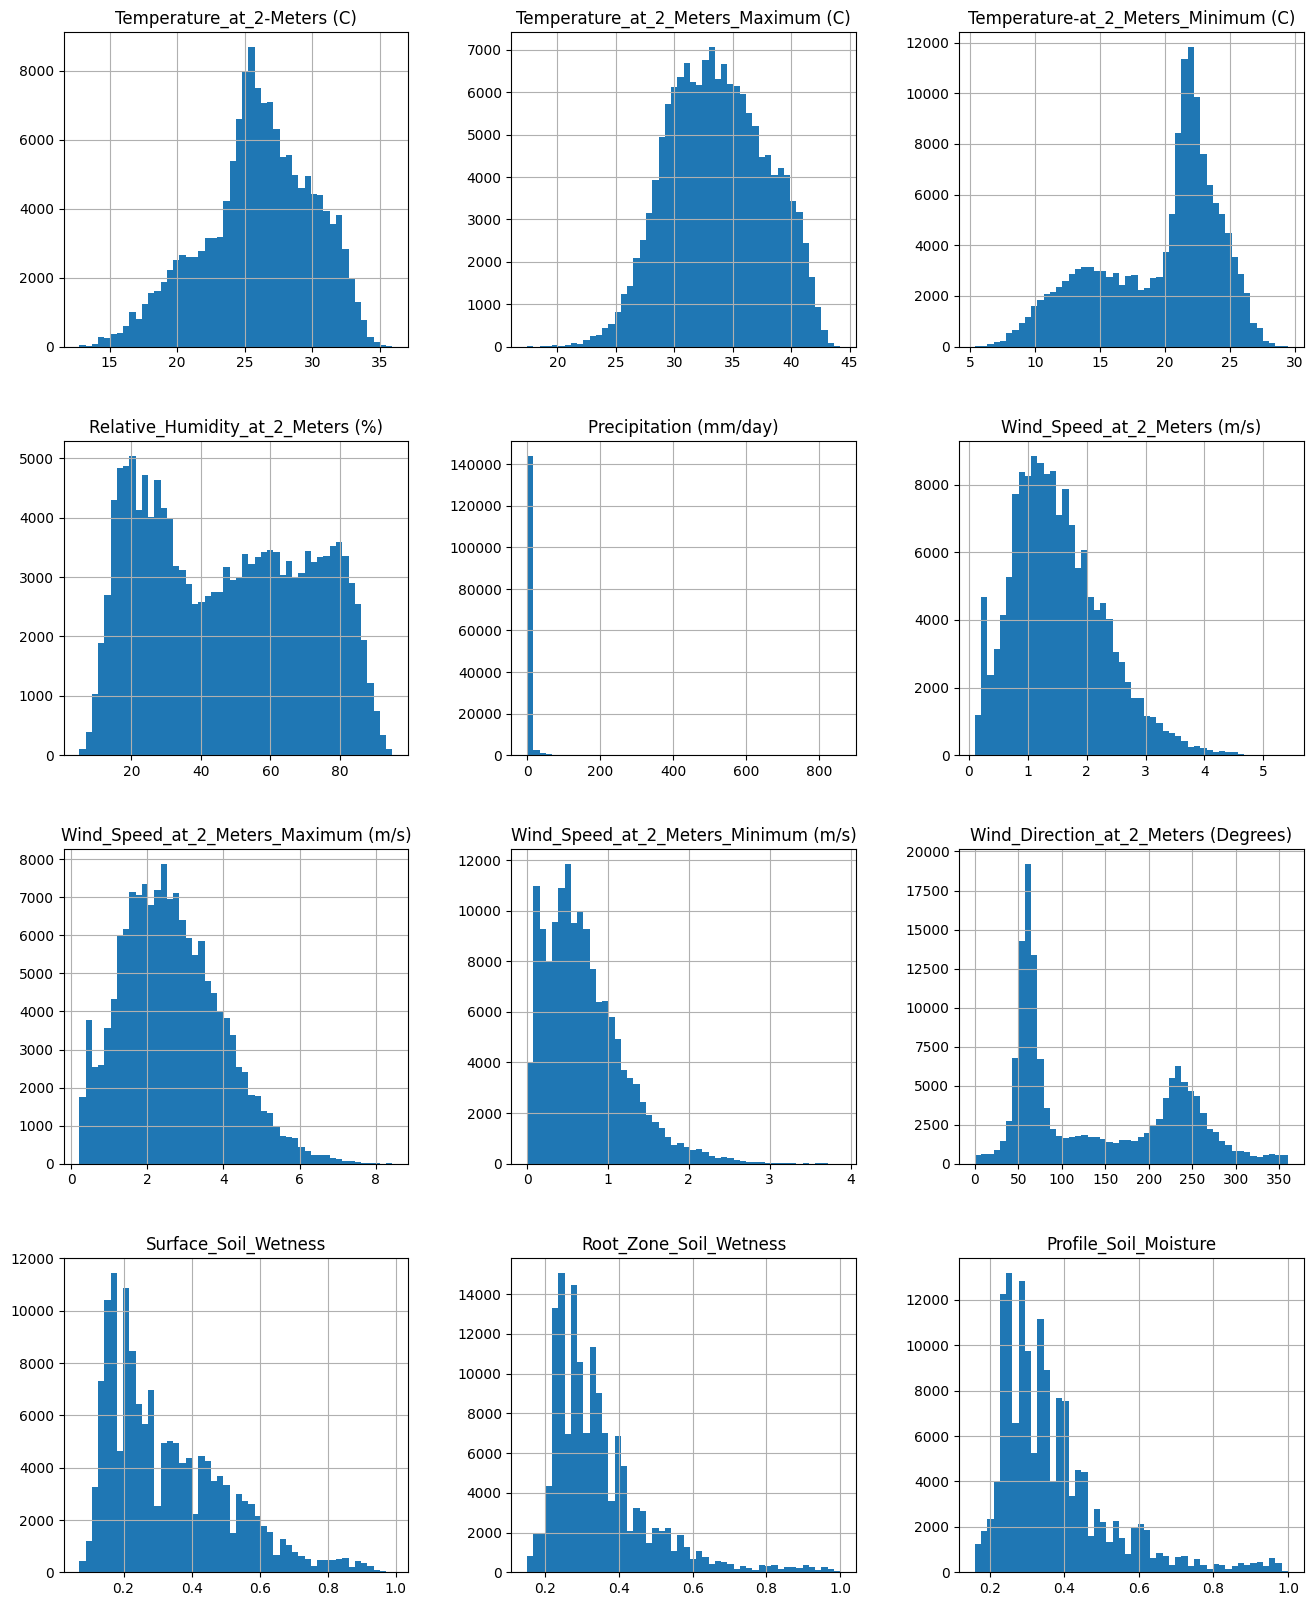

In [20]:
# histograms for all columns in numeric_data

import matplotlib.pyplot as plt
# Plot histograms for all columns in numeric_data
numeric_data.hist(figsize=(16, 20), bins=50)
plt.show()


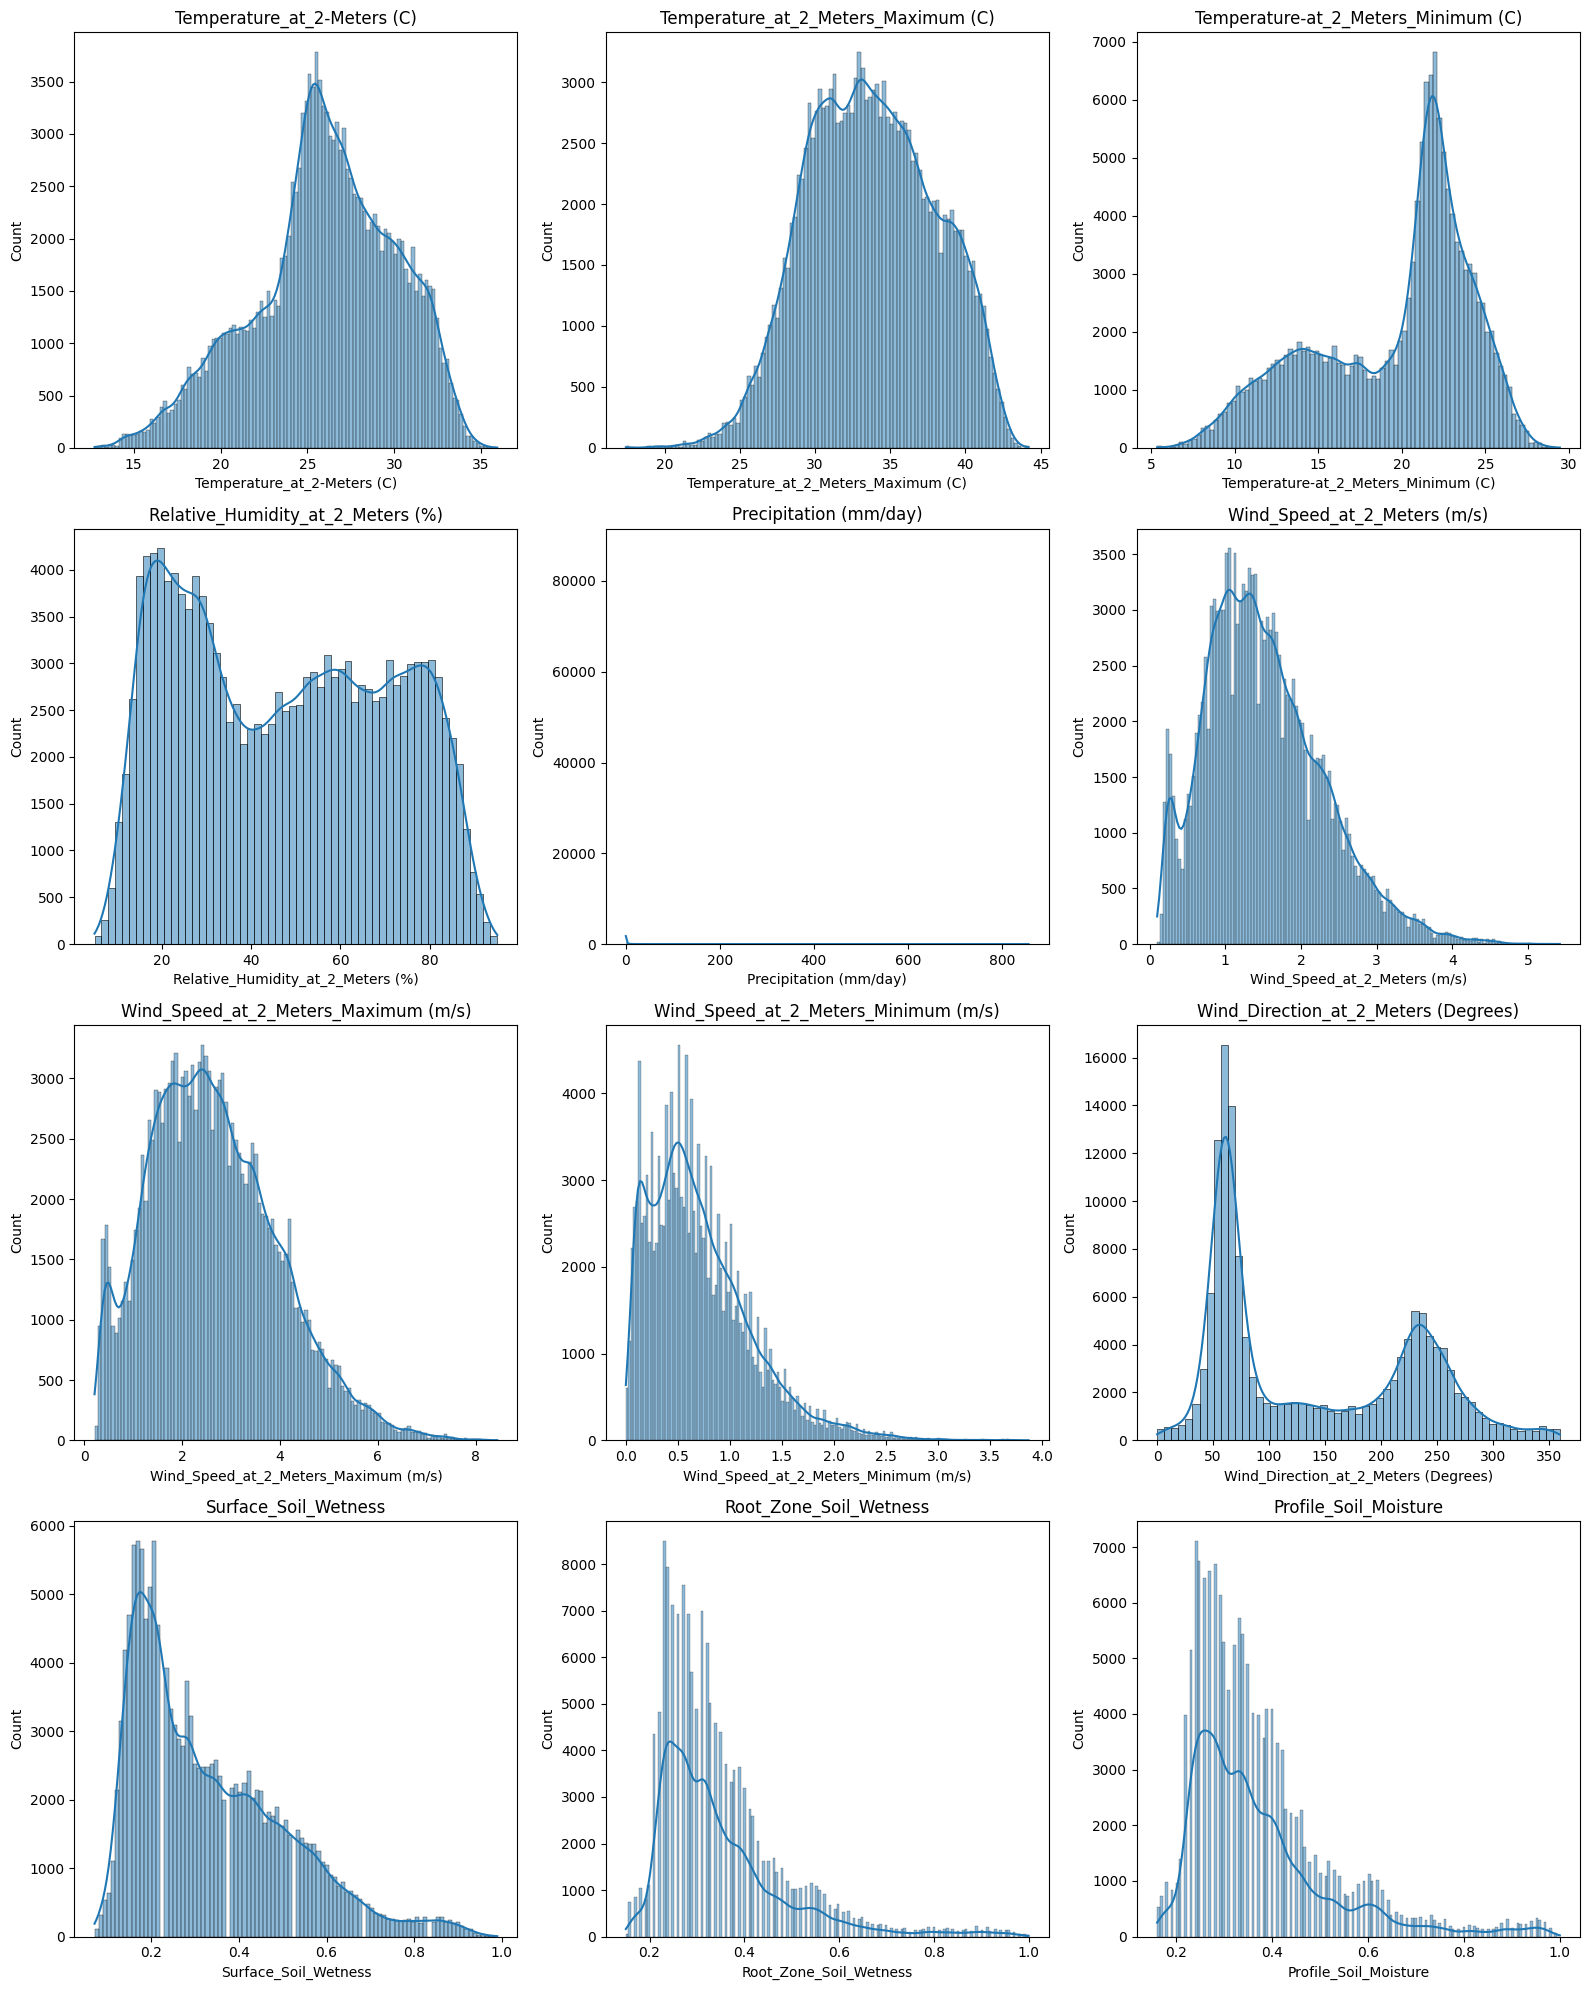

In [21]:
# histograms for all columns in numeric_data using seaborn in a 3x4 grid

import matplotlib.pyplot as plt
fig, axes = plt.subplots(4, 3, figsize=(16, 20))
axes = axes.flatten()

for i, col in enumerate(numeric_data.columns):
  sns.histplot(numeric_data[col], ax=axes[i], kde=True)
  axes[i].set_title(col)

plt.tight_layout()
plt.show()


<Axes: >

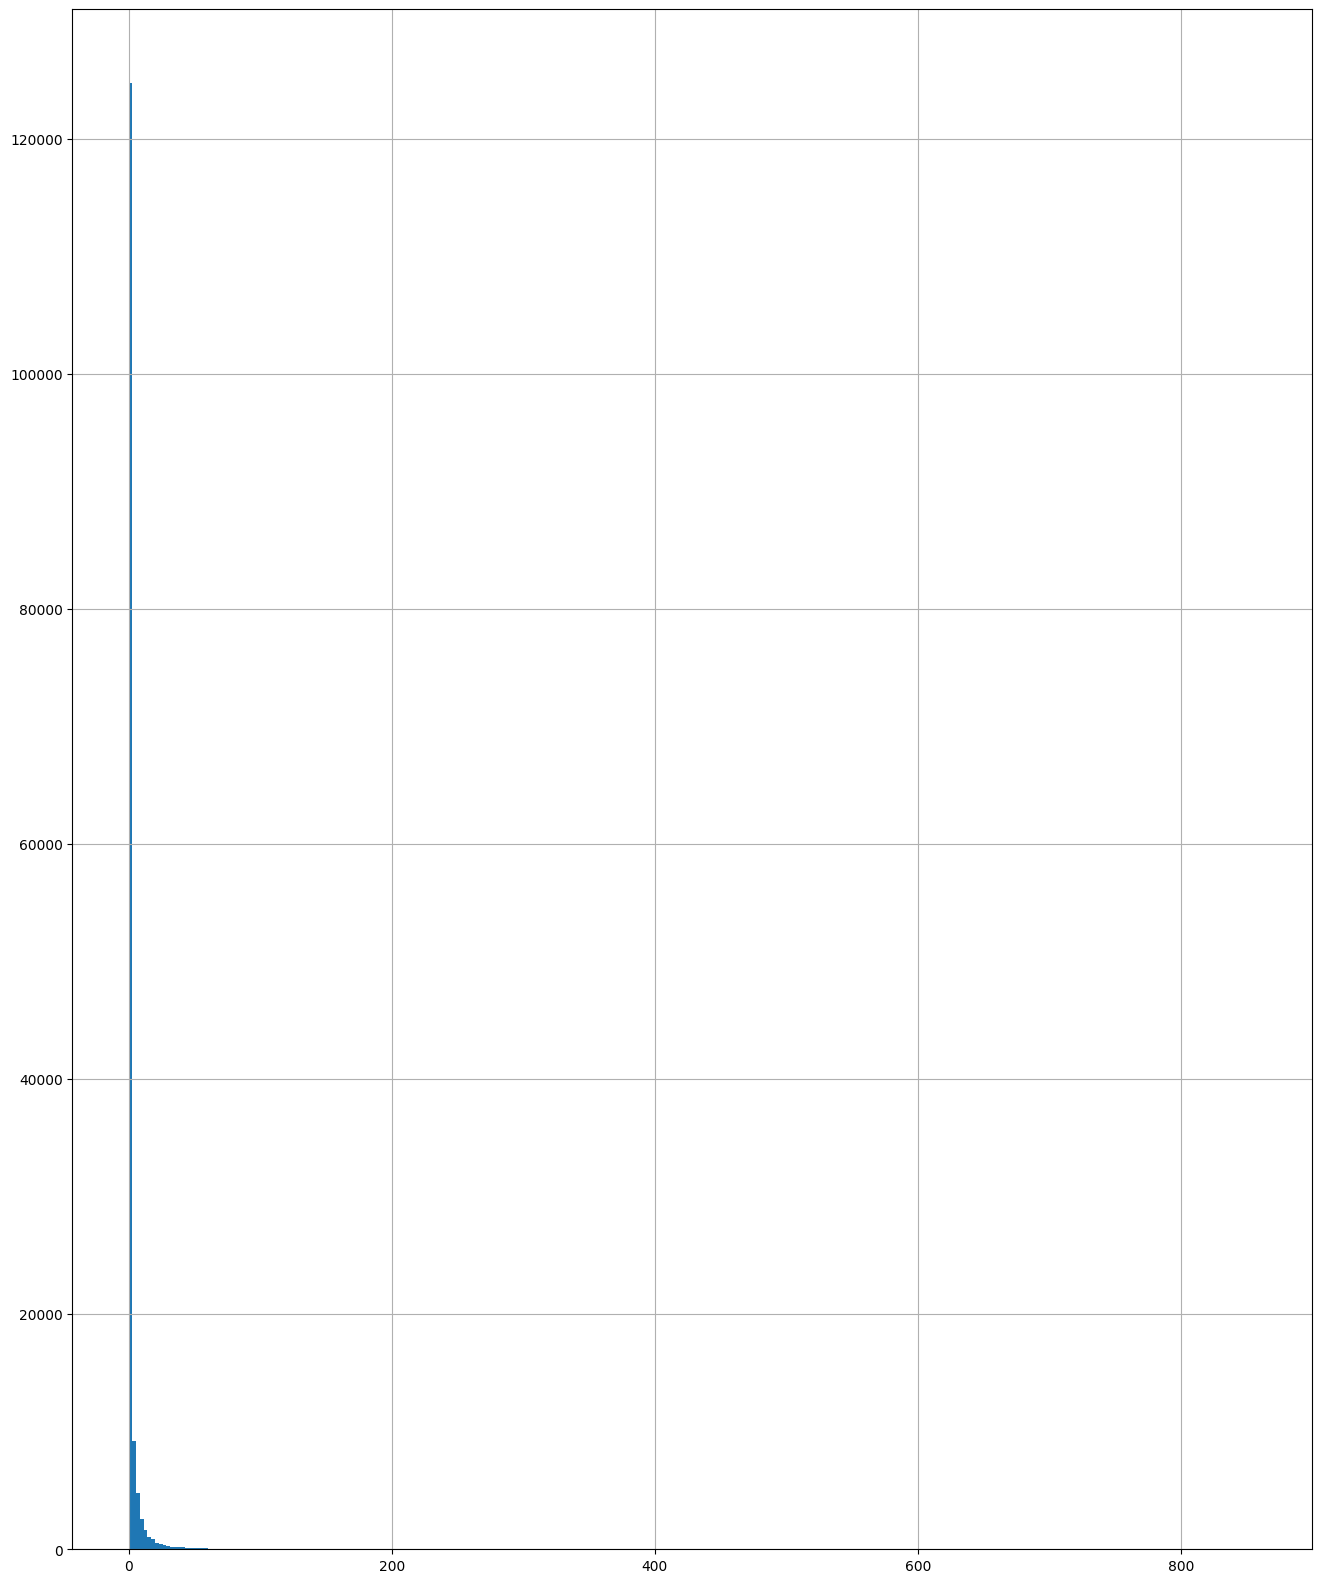

In [22]:
numeric_data['Precipitation (mm/day)'].hist(figsize=(16, 20), bins=300)

### Boxplot

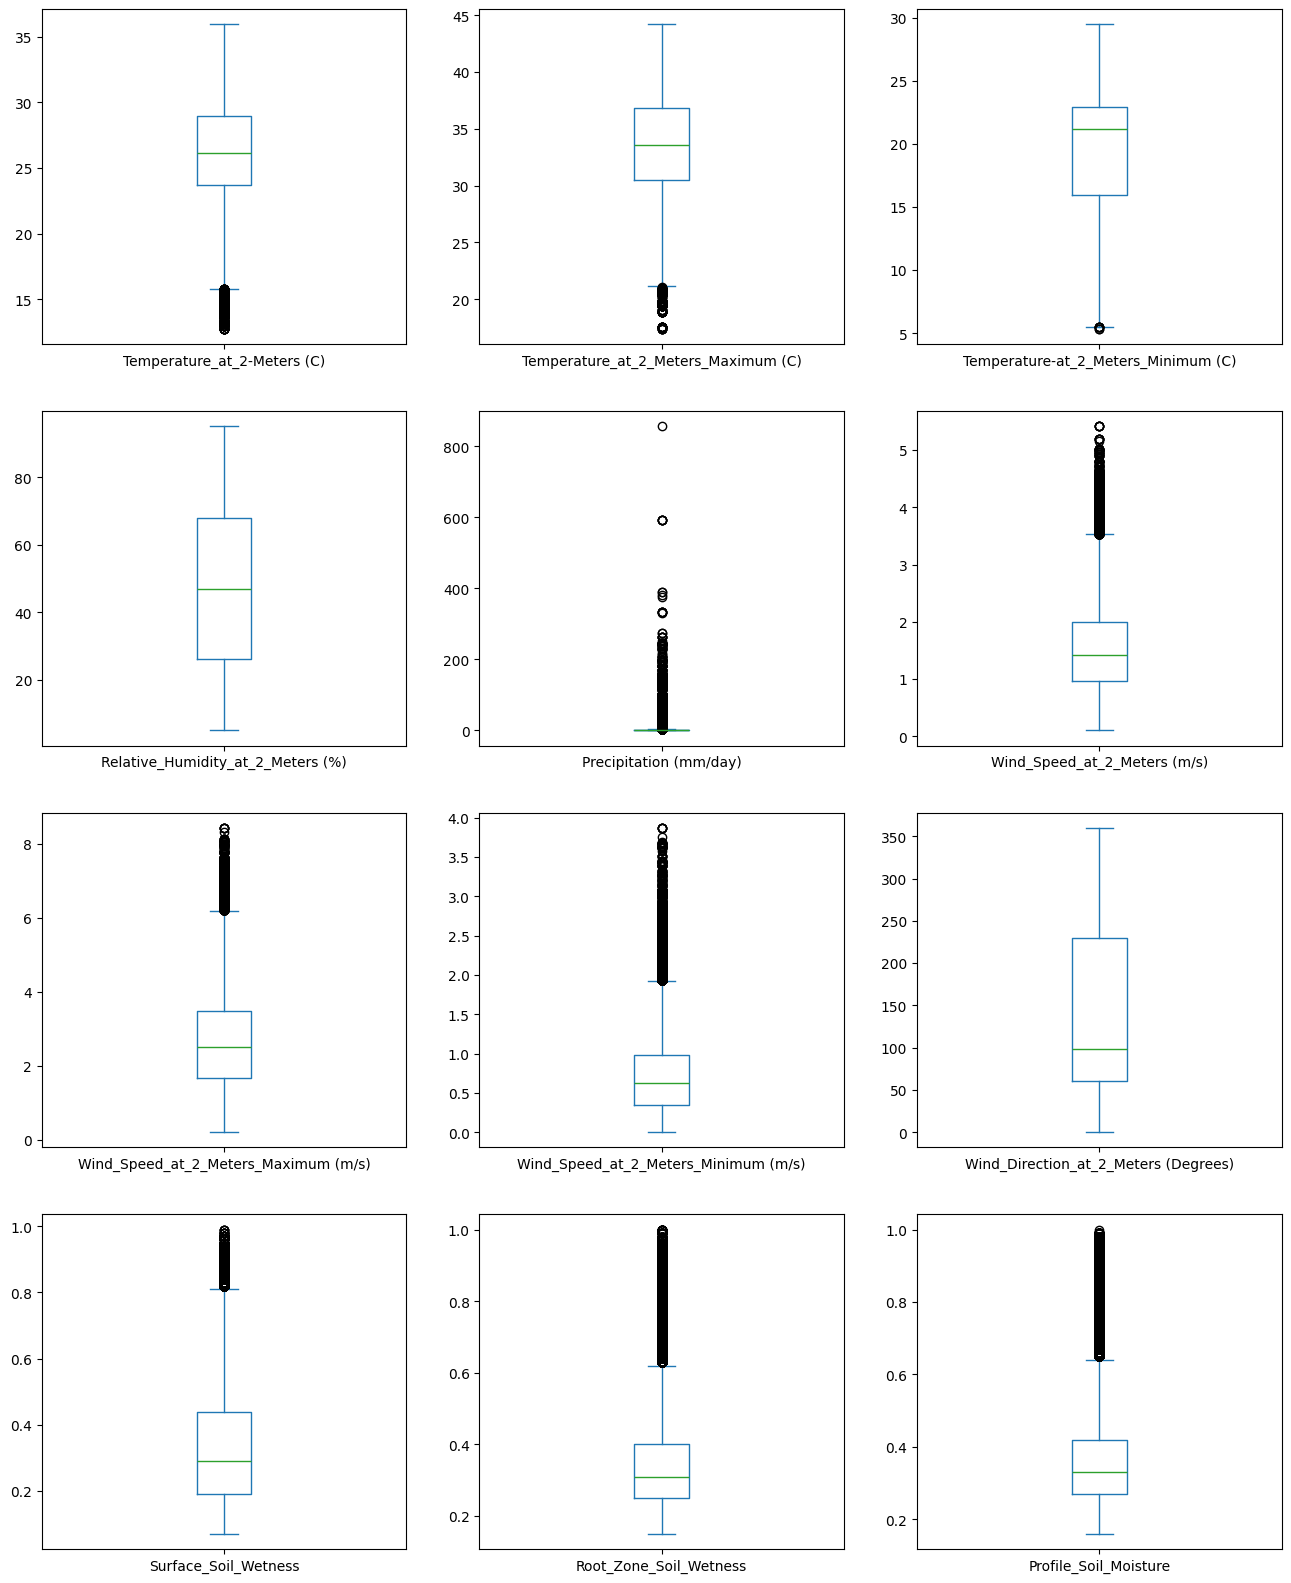

In [23]:
# box plots for all columns in numeric data

import matplotlib.pyplot as plt
# Boxplot for all columns in numeric_data
numeric_data.plot(kind='box', subplots=True, layout=(4,3), figsize=(16, 20))
plt.show()


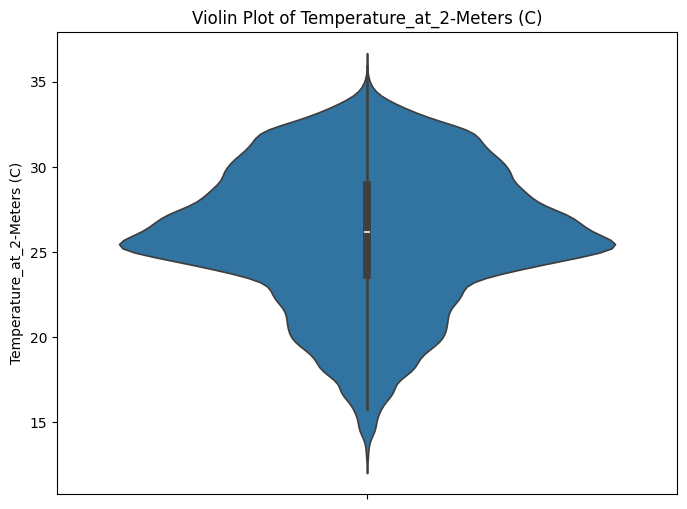

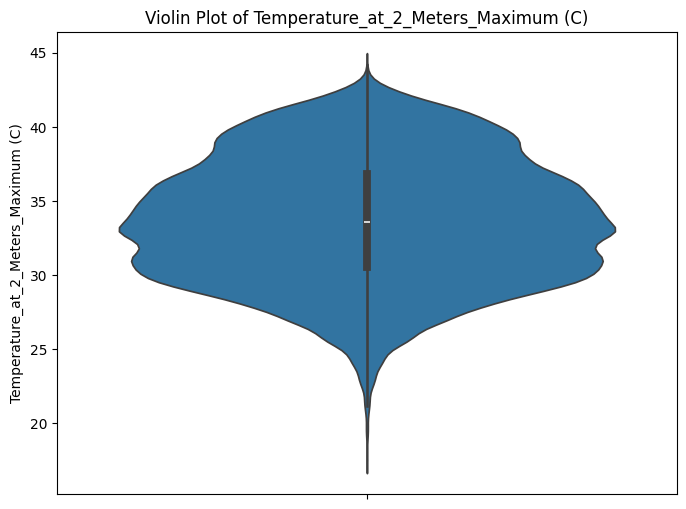

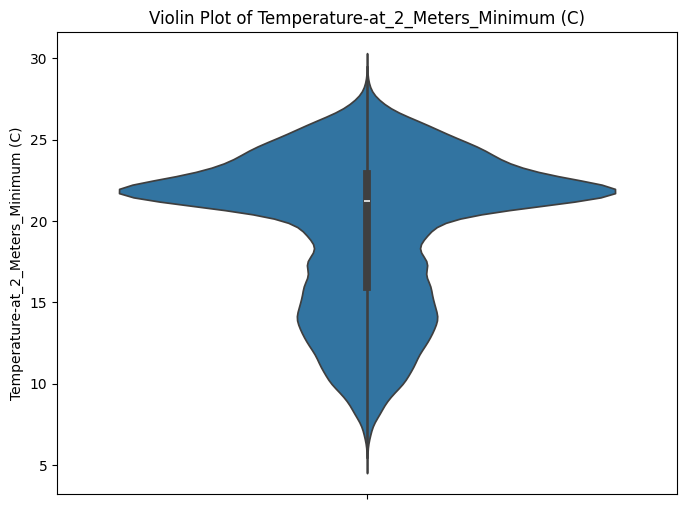

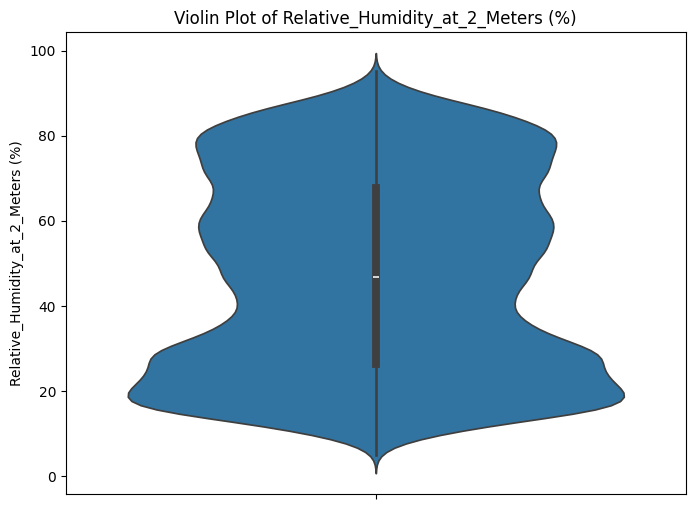

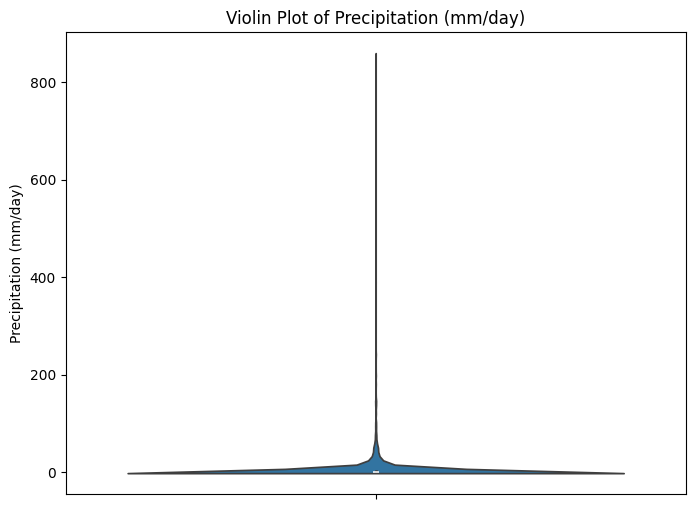

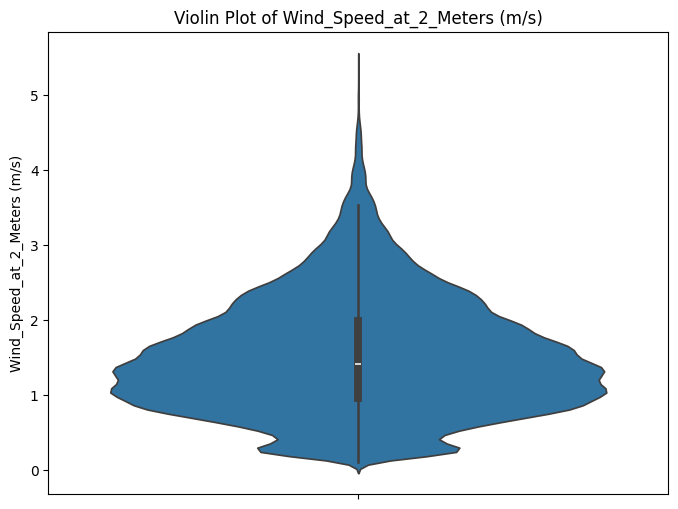

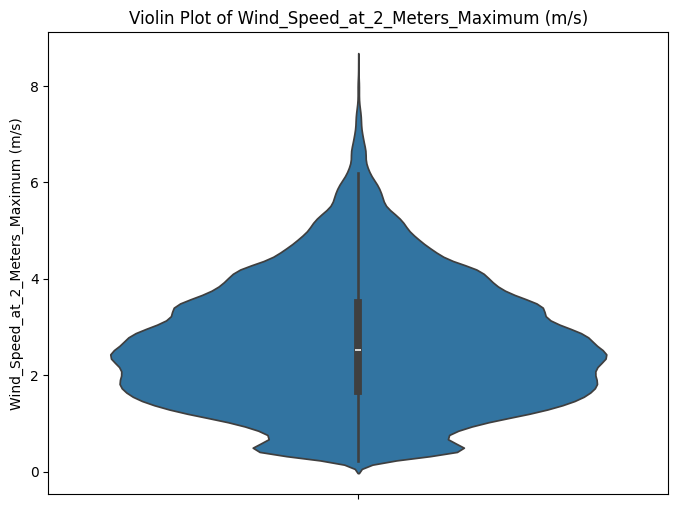

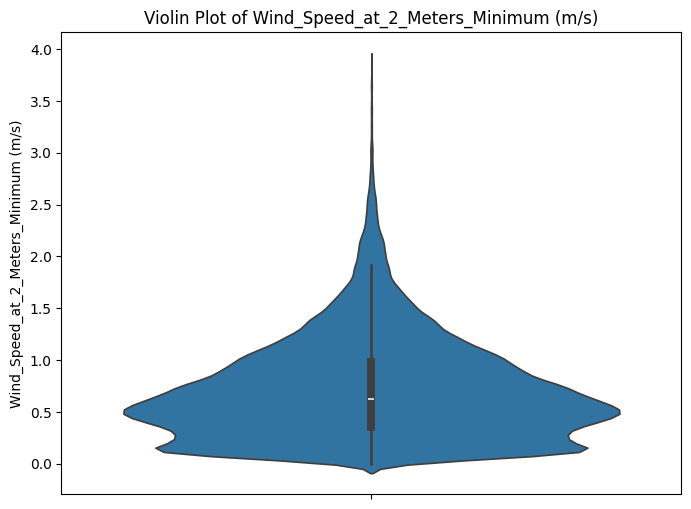

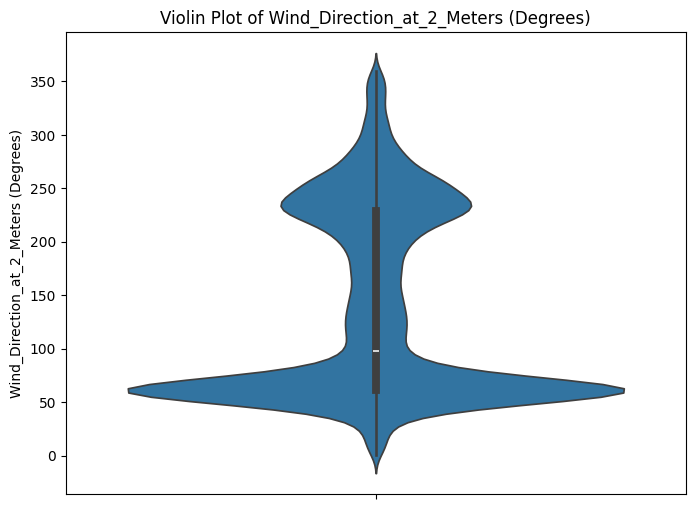

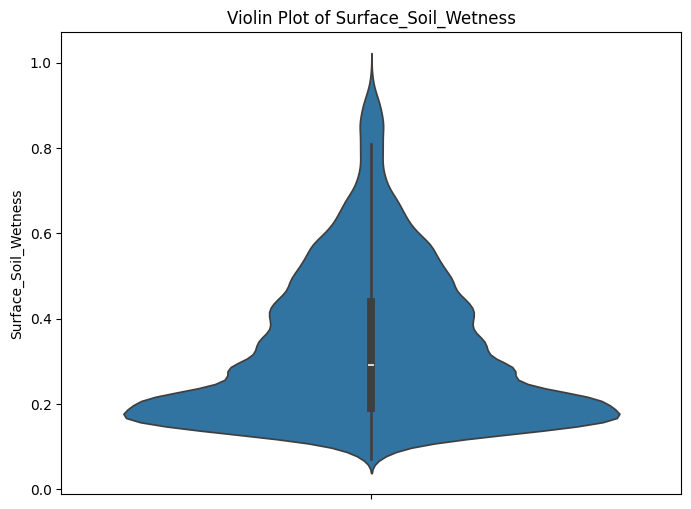

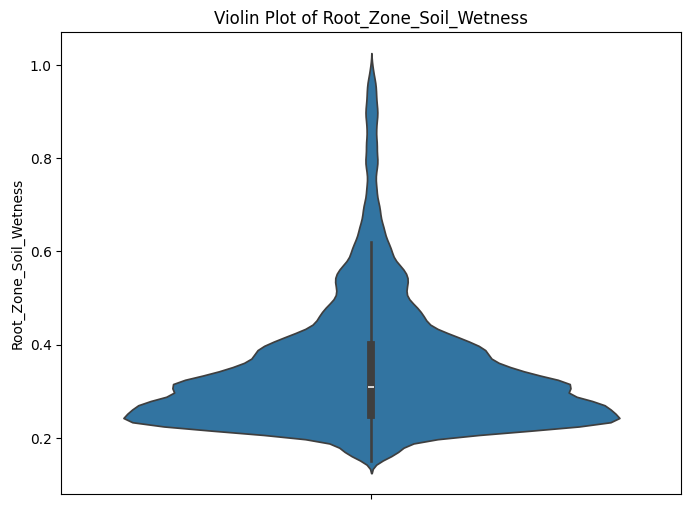

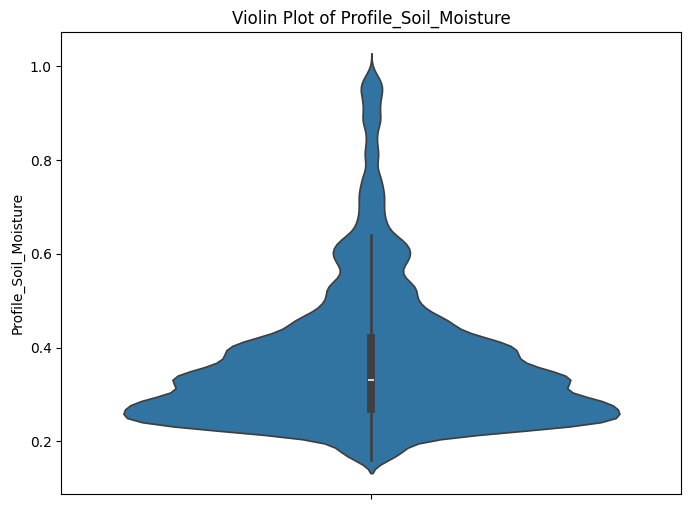

In [24]:
# violin plots for all columns in numeric data

import matplotlib.pyplot as plt
# Individual violin plots for all columns in numeric_data
for col in numeric_data.columns:
    plt.figure(figsize=(8, 6))  # Adjust figure size as needed
    sns.violinplot(y=numeric_data[col])
    plt.title(f'Violin Plot of {col}')
    plt.ylabel(col)
    plt.show()


# Multivariate Analysis

###Correlation Matrix

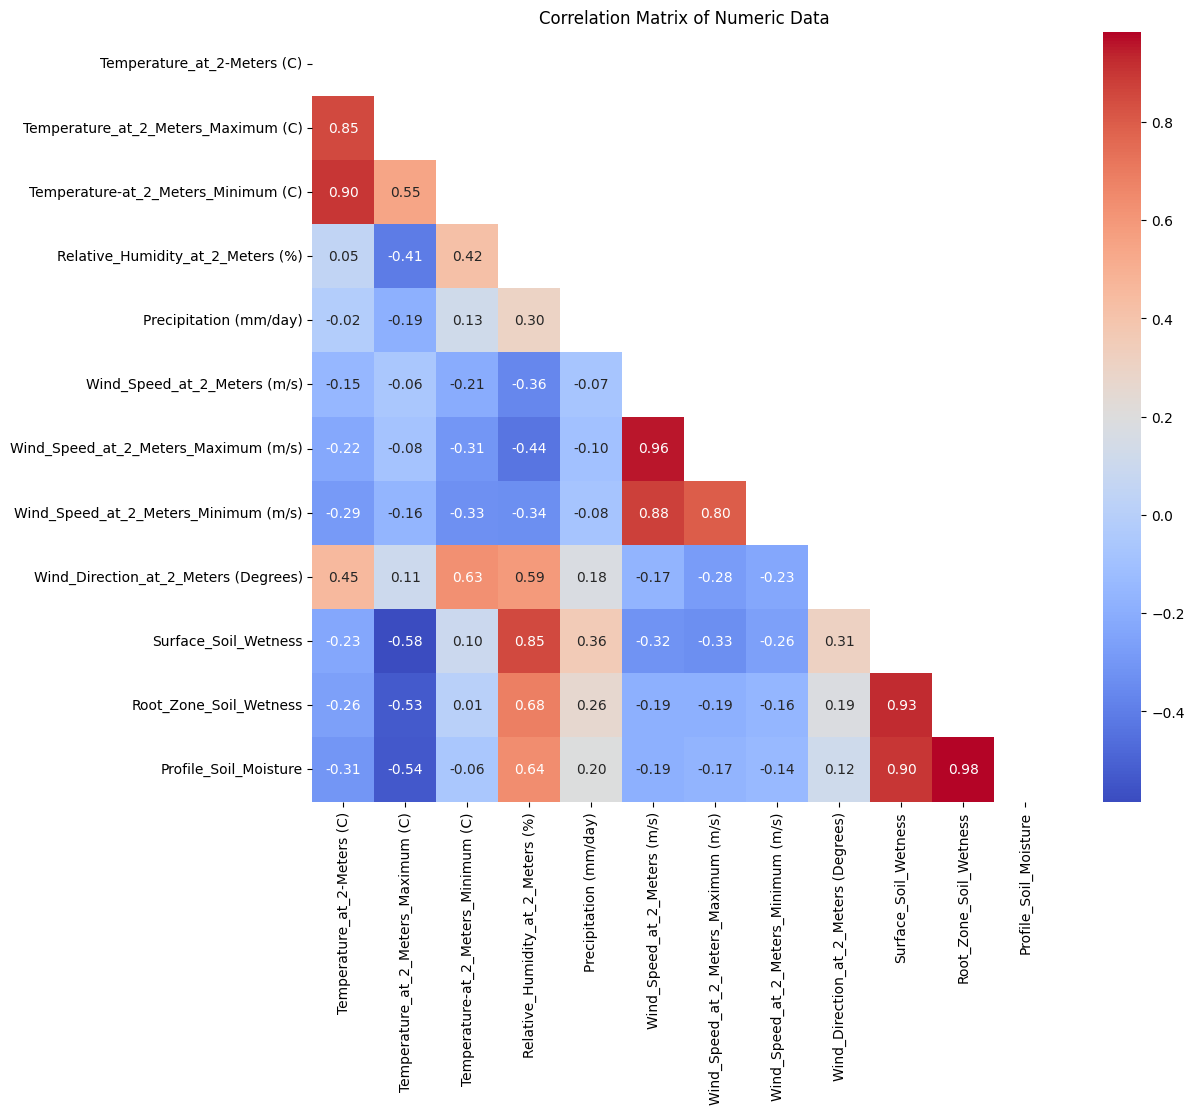

In [25]:
# correlation matrix for numeric_data

import matplotlib.pyplot as plt
# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Display the correlation matrix
#print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
mask = np.triu(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", mask = mask)
plt.title('Correlation Matrix of Numeric Data')
plt.show()


**1. Temperature relationships**

<br>


***a) Temperature at 2 Meters (C) vs. Maximum and Minimum Temperature***

*  There is a strong positive correlation with Maximum Temperature (0.85)

* Very strong correlation with Minimum Temperature (0.90)

This suggests that the daily temperature trends are highly correlated, as expected.

<br>

***b) Temperature at 2 Meters vs. Relative Humidity (-0.41)***

* Moderate negative correlation, meaning higher temperatures are associated with lower humidity, which aligns with typical weather patterns (warmer air tends to be dryer and leads to less humidity).

<br>

***c) Temperature at 2 Meters, Max vs. Soil Moisture (-0.23, -0.58)***

* Moderate negative correlation, meaning higher average and maximum temperatures are associated with lower soil moisture. This makes sense as higher temperatures are expected to lead to faster evaporation of water from the soil, thereby leading to lower soil moisture.


**2. Precipitation and its impact**

<br>

 ***a) Precipitation vs. Relative Humidity (0.30)***

* Moderate positive correlation, meaning humidity tends to increase as rainfall increases, and vice versa.

<br>

***b) Precipitation vs. Wind Speed***

* Weak correlation values (e.g. -0.08, -0.1, -0.07), indicating that rainfall doesn’t have a strong direct relationship with wind speed at a height of 2 meters. However, there is a *slight* tendency for relatively high wind speeds to be accompanied by relatively low rainfall.

**3. Soil moisture**

<br>

***a) Surface Soil Wetness vs. Root Zone Soil Wetness (0.93)***

* Very strong positive correlation, meaning that as surface wetness increases root zone wetness also increases. This indicates consistent moisture movement from surface to deeper layers.

<br>

***b) Soil Moisture vs. Precipitation (0.36, 0.26, 0.2)***

* Moderate positive correlation, meaning rainfall influences surface soil wetness, but other factors also play a role (e.g. evaporation rate, temperature, wind speed etc.).

<br>

***b) Soil Moisture vs. Relative Humidity (0.85, 0.68, 0.64)***

- Moderate to high positive correlation, meaning soil moisture (particularly surface soil wetness) has a strong tendency to move in tandem with relative humidity. It is interesting to note that the soil moisture variables are much more highly correlated with relative humidity than they are with precipitation.


# Temperature Analysis

In [26]:
df['month'] = pd.to_datetime(df['date']).dt.month
df['year'] = pd.to_datetime(df['date']).dt.year

In [27]:
# "Temperature_at_2-Meters (C)" vs year and month:

default_colors = pc.qualitative.Plotly  # Default Plotly color sequence

# Create a color mapping for SUB_REGION
sub_regions = df['SUB_REGION'].unique()
color_map = {sub_region: default_colors[i % len(default_colors)] for i, sub_region in enumerate(sub_regions)}

# Create subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=[
    'Average Temperature (C) by Year',
    'Average Temperature (C) by Month'])

# First plot: Temperature vs. Year
for SUB_REGION, group_data in df.groupby('SUB_REGION'):
    avg_temperature_per_year = group_data.groupby('year')['Temperature_at_2-Meters (C)'].mean()

    fig.add_trace(go.Scatter(
        x=avg_temperature_per_year.index,
        y=avg_temperature_per_year.values,
        mode='lines+markers',
        name=SUB_REGION,
        line=dict(color=color_map[SUB_REGION])
    ), row=1, col=1)

# Second plot: Temperature vs. Month
for SUB_REGION, group_data in df.groupby('SUB_REGION'):
    avg_temperature_per_month = group_data.groupby('month')['Temperature_at_2-Meters (C)'].mean()

    fig.add_trace(go.Scatter(
        x=avg_temperature_per_month.index,
        y=avg_temperature_per_month.values,
        mode='lines+markers',
        name=SUB_REGION,
        line=dict(color=color_map[SUB_REGION]),
        showlegend=(SUB_REGION not in color_map)  # Prevent duplicate legends
    ), row=1, col=2)

# Update layout
fig.update_layout(
    title_text="Temperature Trends: Yearly & Monthly",
    template='plotly_dark',
    showlegend=True,
    xaxis=dict(title="Year", dtick=2),   # Show every 2nd year
    xaxis2=dict(title="Month", dtick=2)  # Show every 2nd month
)

fig.show()

* Yearly Trend (Left Plot): The average temperature remained relatively stable from 2014 and 2019, followed by a sharp decline in 2020, a gradual decline in 2021 and again a sharp decline in 2022. This was followed by a recovery post-2022.
Going by the average temp for each year, the Metropolitan area seems to be approximately 0.25-0.5 degrees (C) warmer than the Northern and Southern regions.

* Monthly Trend (Right Plot): The temperature follows a clear seasonal pattern, peaking around May and decreasing towards December-January. This confirms the cyclic behavior seen in the first plot.

In [28]:
# Seasonal and Long-Term Trends in Temperature

df['date'] = pd.to_datetime(df['date'])  # Convert to datetime

# Filter for the three specific regions
target_regions = ['S_Kano', 'N_Kano', 'Metro']
df_filtered = df[df['SUB_REGION'].isin(target_regions)]

# Aggregate data by month
df_filtered['year_month'] = df_filtered['date'].dt.to_period('M')

# Group by 'year_month' and 'SUB_REGION'
numeric_cols = df_filtered.select_dtypes(include='number').columns
df_grouped = df_filtered.groupby(['year_month', 'SUB_REGION'])[numeric_cols].mean().reset_index()

df_grouped['year_month'] = df_grouped['year_month'].astype(str)

#  Temperature Trends Over Time
fig = px.line(df_grouped, x='year_month', y='Temperature_at_2-Meters (C)', color='SUB_REGION',
              title='Temperature Trends Over Time (By Sub-Region)',
              labels={'Temperature_at_2-Meters (C)': 'Temperature (C)', 'year_month': 'Date'})

fig.update_layout(template='plotly_dark', xaxis_tickangle=-45)
fig.show()


* The temperature exhibits strong seasonal variations with a repeating annual cycle.
* There are periodic peaks (warmer months) and troughs (cooler months) consistently across the years.
* While seasonal fluctuations remain prominent, there seems to be an overall slight decline in temperature after 2018, followed by a noticeable dip around 2021-2022 and a recovery afterward.
* The three sub-regions (Metro, N_Kano, and S_Kano) exhibit similar temperature trends, with slight variations.

# Precipitation Analysis

In [29]:
# "Precipitation (mm/day)" vs year and month:

default_colors = pc.qualitative.Plotly

# Create a color mapping for SUB_REGION
sub_regions = df['SUB_REGION'].unique()
color_map = {sub_region: default_colors[i % len(default_colors)] for i, sub_region in enumerate(sub_regions)}

# Create subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=[
    'Average Precipitation (mm/day) by Year',
    'Average Precipitation (mm/day) by Month'])

# First plot: Precipitation vs. Year
for SUB_REGION, group_data in df.groupby('SUB_REGION'):
    avg_Precipitation_per_year = group_data.groupby('year')['Precipitation (mm/day)'].mean()

    fig.add_trace(go.Scatter(
        x=avg_Precipitation_per_year.index,
        y=avg_Precipitation_per_year.values,
        mode='lines+markers',
        name=SUB_REGION,
        line=dict(color=color_map[SUB_REGION])
    ), row=1, col=1)

# Second plot: Precipitation vs. Month
for SUB_REGION, group_data in df.groupby('SUB_REGION'):
    avg_Precipitation_per_month = group_data.groupby('month')['Precipitation (mm/day)'].mean()

    fig.add_trace(go.Scatter(
        x=avg_Precipitation_per_month.index,
        y=avg_Precipitation_per_month.values,
        mode='lines+markers',
        name=SUB_REGION,
        line=dict(color=color_map[SUB_REGION]),
        showlegend=(SUB_REGION not in color_map)  # Prevent duplicate legends
    ), row=1, col=2)

# Update layout
fig.update_layout(
    title_text="Precipitation Trends: Yearly & Monthly",
    template='plotly_dark',
    showlegend=True,
    xaxis=dict(title="Year", dtick=2),   # Show every 2nd year
    xaxis2=dict(title="Month", dtick=2)  # Show every 2nd month
)

fig.show()

* Yearly Trend (Left Plot): The average daily precipitation remained relatively stable between 2014 and 2019, followed by a sharp increase peaking in 2021. The peak is especially prominent in South Kano, with other locations also showing peaks but at lower values.

* Monthly Trend (Right Plot): The average monthly precipitation follows a clear seasonal pattern, peaking in July and August. S_Kano shows the highest levels during these months, exceeding 8 mm/day, while N_Kano and Metro follow closely.

In [30]:
# Seasonal and Long-Term Trends in Precipitation (mm/day)

df['date'] = pd.to_datetime(df['date'])  # Convert to datetime

# Filter for the three specific regions
target_regions = ['S_Kano', 'N_Kano', 'Metro']
df_filtered = df[df['SUB_REGION'].isin(target_regions)]

# Aggregate data by month
df_filtered['year_month'] = df_filtered['date'].dt.to_period('M')

# Group by 'year_month' and 'SUB_REGION'
numeric_cols = df_filtered.select_dtypes(include='number').columns
df_grouped = df_filtered.groupby(['year_month', 'SUB_REGION'])[numeric_cols].mean().reset_index()

df_grouped['year_month'] = df_grouped['year_month'].astype(str)

#  Temperature Trends Over Time
fig = px.line(df_grouped, x='year_month', y='Precipitation (mm/day)', color='SUB_REGION',
              title='Precipitation Trends Over Time (By Sub-Region)',
              labels={'Precipitation (mm/day)': 'Precipitation', 'year_month': 'Date'})

fig.update_layout(template='plotly_dark', xaxis_tickangle=-45)
fig.show()

* The precipitation exhibits strong seasonal variations with a repeating annual cycle.

* There are periodic peaks (higher precipitation) and troughs (lower precipitation) consistently across the years.

* While seasonal fluctuations remain prominent, there seems to be an overall increase in precipitation after 2018, followed by a significant peak around 2020-2021, especially in S_Kano, and a slight decline afterward.

- Precipitation in later years is visibly marker by inconsistent and unpredictable patterns.

# Humidity Analysis

In [31]:
# "Relative_Humidity_at_2_Meters (%)" vs year and month:

default_colors = pc.qualitative.Plotly

# Create a color mapping for SUB_REGION
sub_regions = df['SUB_REGION'].unique()
color_map = {sub_region: default_colors[i % len(default_colors)] for i, sub_region in enumerate(sub_regions)}

# Create subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=[
    'Average Relative Humidity (%) by Year',
    'Average Relative Humidity (%) by Month'])

# First plot: Relative Humidity vs. Year
for SUB_REGION, group_data in df.groupby('SUB_REGION'):
    avg_Relative_Humidity_per_year = group_data.groupby('year')['Relative_Humidity_at_2_Meters (%)'].mean()

    fig.add_trace(go.Scatter(
        x=avg_Relative_Humidity_per_year.index,
        y=avg_Relative_Humidity_per_year.values,
        mode='lines+markers',
        name=SUB_REGION,
        line=dict(color=color_map[SUB_REGION])
    ), row=1, col=1)

# Second plot: Relative Humidity vs. Month
for SUB_REGION, group_data in df.groupby('SUB_REGION'):
    avg_Relative_Humidity_per_month = group_data.groupby('month')['Relative_Humidity_at_2_Meters (%)'].mean()

    fig.add_trace(go.Scatter(
        x=avg_Relative_Humidity_per_month.index,
        y=avg_Relative_Humidity_per_month.values,
        mode='lines+markers',
        name=SUB_REGION,
        line=dict(color=color_map[SUB_REGION]),
        showlegend=(SUB_REGION not in color_map)  # Prevent duplicate legends
    ), row=1, col=2)

# Update layout
fig.update_layout(
    title_text="Relative Humidity (%) Trends: Yearly & Monthly",
    template='plotly_dark',
    showlegend=True,
    xaxis=dict(title="Year", dtick=2),   # Show every 2nd year
    xaxis2=dict(title="Month", dtick=2)  # Show every 2nd month
)

fig.show()

* Yearly Trend (Left Plot): The average daily humidity remained relatively stable from 2014 and 2019, followed by a significant increase peaking in 2022, especially in S_Kano. After this peak, there is a decline in humidity levels in 2023 followed by an increase in 2023. We can see here that the yearly avg humidity trend is moving in tandem with yearly avg precipitation, indicating that precipitation is likely to be a primary factor that influences humidity (which seems reasonable).

* Monthly Trend (Right Plot): The average daily humidity follows a clear seasonal pattern, peaking in August. S_Kano shows the highest levels during these months, reaching approximately 80%.

In [32]:
# Seasonal and Long-Term Trends in Relative Humidity (%)

df['date'] = pd.to_datetime(df['date'])  # Convert to datetime

# Filter for the three specific regions
target_regions = ['S_Kano', 'N_Kano', 'Metro']
df_filtered = df[df['SUB_REGION'].isin(target_regions)]

# Aggregate data by month
df_filtered['year_month'] = df_filtered['date'].dt.to_period('M')

# Group by 'year_month' and 'SUB_REGION'
numeric_cols = df_filtered.select_dtypes(include='number').columns
df_grouped = df_filtered.groupby(['year_month', 'SUB_REGION'])[numeric_cols].mean().reset_index()

df_grouped['year_month'] = df_grouped['year_month'].astype(str)

#  Temperature Trends Over Time
fig = px.line(df_grouped, x='year_month', y='Relative_Humidity_at_2_Meters (%)', color='SUB_REGION',
              title='Relative Humidity Trends Over Time (By Sub-Region)',
              labels={'Relative_Humidity_at_2_Meters (%)': 'Relative Humidity(%)', 'year_month': 'Date'})

fig.update_layout(template='plotly_dark', xaxis_tickangle=-45)
fig.show()

* The relative humidity exhibits strong seasonal variations with a repeating annual cycle.

* There are periodic peaks (higher humidity) and troughs (lower humidity) consistently across the years.

* While seasonal fluctuations remain prominent, there seems to be an overall increase in humidity from 2018 to 2021, and a slight decline afterwards.

# Wind Speed Analysis

In [33]:
# "Wind_Speed_at_2_Meters (m/s)" vs year and month:

default_colors = pc.qualitative.Plotly

# Create a color mapping for SUB_REGION
sub_regions = df['SUB_REGION'].unique()
color_map = {sub_region: default_colors[i % len(default_colors)] for i, sub_region in enumerate(sub_regions)}

# Create subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=[
    'Average Wind Speed (m/s) by Year',
    'Average Wind Speed (m/s) by Month'])

# First plot: Wind Speed vs. Year
for SUB_REGION, group_data in df.groupby('SUB_REGION'):
    avg_Wind_Speed_per_year = group_data.groupby('year')['Wind_Speed_at_2_Meters (m/s)'].mean()

    fig.add_trace(go.Scatter(
        x=avg_Wind_Speed_per_year.index,
        y=avg_Wind_Speed_per_year.values,
        mode='lines+markers',
        name=SUB_REGION,
        line=dict(color=color_map[SUB_REGION])
    ), row=1, col=1)

# Second plot: Wind Speed vs. Month
for SUB_REGION, group_data in df.groupby('SUB_REGION'):
    avg_Wind_Speed_per_month = group_data.groupby('month')['Wind_Speed_at_2_Meters (m/s)'].mean()

    fig.add_trace(go.Scatter(
        x=avg_Wind_Speed_per_month.index,
        y=avg_Wind_Speed_per_month.values,
        mode='lines+markers',
        name=SUB_REGION,
        line=dict(color=color_map[SUB_REGION]),
        showlegend=(SUB_REGION not in color_map)  # Prevent duplicate legends
    ), row=1, col=2)

# Update layout
fig.update_layout(
    title_text="Wind Speed (m/s) Trends: Yearly & Monthly",
    template='plotly_dark',
    showlegend=True,
    xaxis=dict(title="Year", dtick=2),   # Show every 2nd year
    xaxis2=dict(title="Month", dtick=2)  # Show every 2nd month
)

fig.show()

* Yearly Trend: The wind speed exhibits minor variations with a generally stable trend across the years. There are slight fluctuations consistently across the years. The overall trend shows stable wind speeds for the Kano Metropolitan Area around 0.8 m/s, with N_Kano and S_Kano fluctuating between 1.4 and 1.6 m/s. We can observe that the wind speed in the Kano Metropolitan Area is substantially lower that North and South Kano; a likely reason for this is greater urban development in the Kano Metro Area - which is likely to disrupt and fragment the flow of wind.

* Monthly Trend: The wind speed exhibits a strong seasonal variation. There are periodic peaks in January and December, and troughs in the middle months, consistently across the years. Here, again, we see that the monthly average wind speeds observed in Kano Metropolitan Area are lower than the North and South Kano averages.

In [34]:
# Seasonal and Long-Term Trends in Wind Speed (m/s)

df['date'] = pd.to_datetime(df['date'])

# Filter for the three specific regions
target_regions = ['S_Kano', 'N_Kano', 'Metro']
df_filtered = df[df['SUB_REGION'].isin(target_regions)]

# Aggregate data by month
df_filtered['year_month'] = df_filtered['date'].dt.to_period('M')

# Group by 'year_month' and 'SUB_REGION'
numeric_cols = df_filtered.select_dtypes(include='number').columns  # Get numeric columns
df_grouped = df_filtered.groupby(['year_month', 'SUB_REGION'])[numeric_cols].mean().reset_index()

df_grouped['year_month'] = df_grouped['year_month'].astype(str)  # Convert back for plotting

# Soil Moisture Trends Over Time
fig = px.line(df_grouped, x='year_month', y='Wind_Speed_at_2_Meters (m/s)', color='SUB_REGION',
              title='Wind Speed (m/s) Trends Over Time (By Sub-Region)',
              labels={'Wind_Speed_at_2_Meters (m/s)': 'Wind Speed (m/s)', 'year_month': 'Date'})

fig.update_layout(template='plotly_dark', xaxis_tickangle=-45)
fig.show()


* The wind speed exhibits strong seasonal variations with a repeating annual cycle.

* There are periodic peaks and troughs consistently across the years.

* Comparing regions, S_Kano and N_Kano show the highest wind speeds during the peak months, reaching approximately 2.2 m/s. The Kano Metropolitan Area follows a similar patterns but at a lower level, peaking around 1.3 m/s every year.

# Surface Soil Wetness Analysis

In [35]:
# "Surface_Soil_Wetness" vs year and month:

default_colors = pc.qualitative.Plotly

# Create a color mapping for SUB_REGION
sub_regions = df['SUB_REGION'].unique()
color_map = {sub_region: default_colors[i % len(default_colors)] for i, sub_region in enumerate(sub_regions)}

# Create subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=[
    'Average Surface Soil Wetness by Year',
    'Average Surface Soil Wetness by Month'])

# First plot: Surface Soil Wetness vs. Year
for SUB_REGION, group_data in df.groupby('SUB_REGION'):
    avg_Surface_Soil_Wetness_per_year = group_data.groupby('year')['Surface_Soil_Wetness'].mean()

    fig.add_trace(go.Scatter(
        x=avg_Surface_Soil_Wetness_per_year.index,
        y=avg_Surface_Soil_Wetness_per_year.values,
        mode='lines+markers',
        name=SUB_REGION,
        line=dict(color=color_map[SUB_REGION])
    ), row=1, col=1)

# Second plot: Surface Soil Wetness vs. Month
for SUB_REGION, group_data in df.groupby('SUB_REGION'):
    avg_Surface_Soil_Wetness_per_month = group_data.groupby('month')['Surface_Soil_Wetness'].mean()

    fig.add_trace(go.Scatter(
        x=avg_Surface_Soil_Wetness_per_month.index,
        y=avg_Surface_Soil_Wetness_per_month.values,
        mode='lines+markers',
        name=SUB_REGION,
        line=dict(color=color_map[SUB_REGION]),
        showlegend=(SUB_REGION not in color_map)  # Prevent duplicate legends
    ), row=1, col=2)

# Update layout
fig.update_layout(
    title_text="Surface Soil Wetness Trends: Yearly & Monthly",
    template='plotly_dark',
    showlegend=True,
    xaxis=dict(title="Year", dtick=2),   # Show every 2nd year
    xaxis2=dict(title="Month", dtick=2)  # Show every 2nd month
)

fig.show()

- Yearly Trend: Surface soil wetness levels remained relatively stable and low from 2014 to 2019, followed by a sharp increase in 2020 and peaking in 2021 across all regions. A noticeable decline is observed in 2022, especially in the Metro region, before slightly rising again in 2024.
S_Kano consistently shows the highest surface wetness, particularly during peak years. The Metropolitan Area shows slightly lower values compared to North and South Kano.

- Monthly Trend:
Soil wetness is lowest between January and April.
A sharp rise begins in May, peaking around August, indicating the main rainy season. It gradually declines from September to December. All regions follow a similar seasonal curve.
S_Kano again has the highest wetness levels month-to-month.
Metro consistently records the lowest moisture levels, especially at the peak.

In [36]:
# Seasonal and Long-Term Trends in Surface Soil Wetness

df['date'] = pd.to_datetime(df['date'])  # Convert to datetime

# Filter for the three specific regions
target_regions = ['S_Kano', 'N_Kano', 'Metro']
df_filtered = df[df['SUB_REGION'].isin(target_regions)]

# Aggregate data by month
df_filtered['year_month'] = df_filtered['date'].dt.to_period('M')

# Group by 'year_month' and 'SUB_REGION'
numeric_cols = df_filtered.select_dtypes(include='number').columns
df_grouped = df_filtered.groupby(['year_month', 'SUB_REGION'])[numeric_cols].mean().reset_index()

df_grouped['year_month'] = df_grouped['year_month'].astype(str)

#  Temperature Trends Over Time
fig = px.line(df_grouped, x='year_month', y='Surface_Soil_Wetness', color='SUB_REGION',
              title='Surface Soil Wetness Trends Over Time (By Sub-Region)',
              labels={'Surface_Soil_Wetness': 'Surface Soil Wetness', 'year_month': 'Date'})

fig.update_layout(template='plotly_dark', xaxis_tickangle=-45)
fig.show()

Surface soil wetness in all three sub-regions (Metro, N_Kano, S_Kano) shows a clear annual cycle, peaking during the rainy season (July–September) and dipping during the dry season (Jan–April). S_Kano consistently records slightly higher wetness, while Metro tends to be lower. Peak values vary by year, with 2021 and 2022 showing notably high moisture levels. This pattern supports using soil moisture as a seasonal planting guide.

Root Zone and Profile soil moisture will be similar to surface soil wetness.